In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets

In [2]:
df=pd.read_csv("CSV/marketing_campaign.csv",delimiter='	')
df.drop(['Complain', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Dt_Customer','Education','ID'], axis=1, inplace=True)
df = df[df['Income'].notna()]
df.shape

(2216, 19)

In [3]:
df#ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1957,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,3,11
1,1954,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,3,11
2,1965,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,3,11
3,1984,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,3,11
4,1981,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,3,11
2236,1946,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,3,11
2237,1981,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,3,11
2238,1956,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,3,11


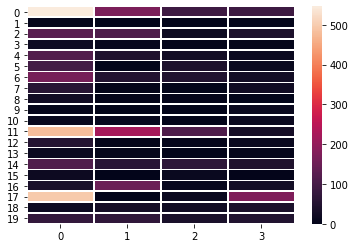

In [4]:
n = 20
x1 = np.array(df['Kidhome'][0:n])
x1 = x1.reshape(len(x1), 1)
x2 = np.array(df['Marital_Status'][0:n])
x2 = x2.reshape(len(x2), 1)
k=0
for i in x2:
    S = ['Single','Married','Divorced','Together','Widow']
    for j in range(len(S)):
        if S[j]==i[0]:x2[k]=j
    k+=1
x3 = np.array(df['Year_Birth'][0:n])
x3 = x3.reshape(len(x3), 1)
x4 = np.array(df['Income'][0:n])
x4 = x4.reshape(len(x4), 1)
#x5 = np.array(df['Kidhome'][0:n])
#x5 = x5.reshape(len(x5), 1)
x = np.concatenate((x1,x2,x3,x4),1)
y = np.array(df['NumStorePurchases'][0:n])
y = y.reshape(len(y), 1)
# ax = sns.heatmap(x1, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x3, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x4, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x5, linewidth=0.5)
# plt.show()
y1 = np.array(df['MntMeatProducts'][0:n])
y1 = y1.reshape(len(y1), 1)
y2 = np.array(df['MntFishProducts'][0:n])
y2 = y2.reshape(len(y2), 1)
y3 = np.array(df['MntSweetProducts'][0:n])
y3 = y3.reshape(len(y3), 1)
y4 = np.array(df['MntGoldProds'][0:n])
y4 = y4.reshape(len(y4), 1)
y_n = np.concatenate((y1,y2,y3,y4),1)
#print(x)
ax = sns.heatmap(y_n, linewidth=0.5)
plt.show()

<AxesSubplot:>

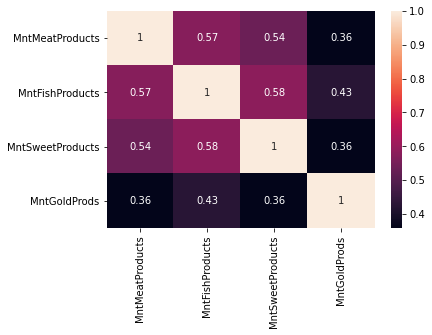

In [5]:
df_new = df[['MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
sns.heatmap(df_new.corr(), annot = True)

<AxesSubplot:>

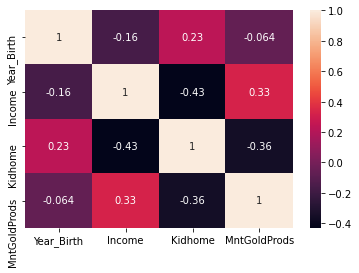

In [6]:
df_new_1 = df[['Year_Birth','Income','Kidhome','MntGoldProds']]
sns.heatmap(df_new_1.corr(), annot = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x25203109280>,
 'caps': [<matplotlib.lines.Line2D at 0x25203109940>,
 'boxes': [<matplotlib.lines.Line2D at 0x252030f5ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x25203116040>,
 'fliers': [<matplotlib.lines.Line2D at 0x252031163a0>,
 'means': []}

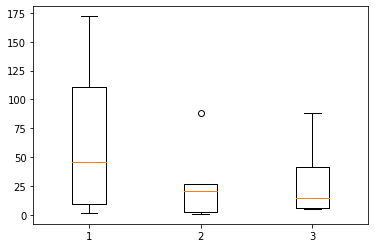

In [7]:
plt.boxplot(df[['MntFishProducts','MntSweetProducts','MntGoldProds']].head(5))

In [8]:
my_df = df[['MntFishProducts','MntSweetProducts','MntGoldProds']].head(100)
min_max_scaler = preprocessing.MinMaxScaler()
cols = my_df.columns
np_scaled = min_max_scaler.fit_transform(my_df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.757709,0.494382,0.365145
1,0.008811,0.005618,0.024896
2,0.488987,0.117978,0.174274
3,0.044053,0.016854,0.020747
4,0.202643,0.151685,0.062241
...,...,...,...
95,0.220264,0.146067,0.157676
96,0.044053,0.000000,0.037344
97,0.008811,0.005618,0.029046
98,0.330396,0.550562,0.269710


In [9]:
from sklearn.model_selection import train_test_split
n = 20
x1 = np.array(df['Kidhome'][0:n])
x1 = x1.reshape(len(x1), 1)
x2 = np.array(df['Marital_Status'][0:n])
x2 = x2.reshape(len(x2), 1)
k=0
for i in x2:
    S = ['Single','Married','Divorced','Together','Widow']
    for j in range(len(S)):
        if S[j]==i[0]:x2[k]=j
    k+=1
x3 = np.array(df['Year_Birth'][0:n])
x3 = x3.reshape(len(x3), 1)
x4 = np.array(df['Income'][0:n])
x4 = x4.reshape(len(x4), 1)
#x5 = np.array(df['Kidhome'][0:n])
#x5 = x5.reshape(len(x5), 1)
x = np.concatenate((x1,x2,x3,x4),1)
# y = np.array(df['NumStorePurchases'][0:n])
# y = y.reshape(len(y), 1)

y1 = np.array(df['MntMeatProducts'][0:n])
y1 = y1.reshape(len(y1), 1)
y2 = np.array(df['MntFishProducts'][0:n])
y2 = y2.reshape(len(y2), 1)
y3 = np.array(df['MntSweetProducts'][0:n])
y3 = y3.reshape(len(y3), 1)
y4 = np.array(df['MntGoldProds'][0:n])
y4 = y4.reshape(len(y4), 1)
y_n = np.concatenate((y1,y2,y3,y4),1)

X_train, X_test, y_train, y_test = train_test_split(x, y_n, test_size=0.2, random_state=12345)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)
from sklearn.metrics import mean_squared_error
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [17]:
from math import sqrt
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

82.31190086152488

In [19]:
# cmap = sns.cubehelix_palette(as_cmap=True)
# f, ax = plt.subplots()
# points = ax.scatter(X_test[:, 0], X_test[:, 1], s=50, cmap=cmap)
# f.colorbar(points)
# plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
         118       0.00      0.00      0.00       1.0
         127       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 44.666666666666664
Mean Squared Error: 3584.1666666666665
Root Mean Squared Error: 59.86791015783553


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.93\nsamples = 16\nvalue = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.9\nsamples = 10\nvalue = [0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1\n1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.778\nsamples = 6\nvalue = [2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0\n0]')]

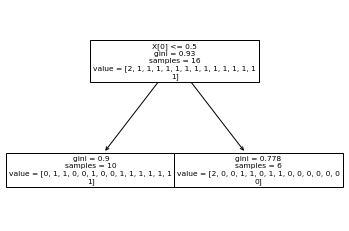

In [41]:
tree.plot_tree(classifier)

In [47]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y1)
# clf.support_vectors_
# clf.n_support_


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [51]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x1, y1)
dec = clf.decision_function([[1]])
print(dec.shape[1])
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
print(dec.shape[1])

153
18


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [52]:
clf.predict(x2)

array([546, 546,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
        19, 546,  19,  19,  19, 546,  19], dtype=int64)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(x, y_n)
clf.apply(x)
clf.decision_path(x)

# from sklearn.tree import export_graphviz
# import pydotplus
# import six
# from sklearn import tree 

# from sklearn import datasets
# from IPython.display import Image  
# import pydotplus

# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in clf.estimators_:
#     if (i_tree ==3):        
#         tree.export_graphviz(tree_in_forest, out_file=dotfile)
#         graph = pydotplus.graph_from_dot_data(dotfile.getvalue())        
#     i_tree = i_tree + 1
# Image(graph.create_png())

# # Create DOT data
# dot_data = tree.export_graphviz(clf, out_file=None)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

(<20x2018 sparse matrix of type '<class 'numpy.int64'>'
 	with 9992 stored elements in Compressed Sparse Row format>,
 array([   0,   21,   40,   57,   78,   95,  108,  125,  144,  167,  190,
         207,  230,  247,  270,  293,  316,  327,  350,  369,  392,  407,
         428,  449,  472,  491,  510,  529,  552,  577,  600,  619,  638,
         659,  680,  699,  718,  735,  758,  775,  798,  815,  834,  851,
         876,  897,  914,  933,  948,  965,  988, 1007, 1026, 1041, 1060,
        1077, 1096, 1117, 1140, 1165, 1186, 1205, 1216, 1239, 1262, 1281,
        1304, 1323, 1344, 1367, 1392, 1411, 1426, 1449, 1466, 1485, 1512,
        1535, 1558, 1585, 1608, 1629, 1650, 1669, 1690, 1713, 1730, 1749,
        1768, 1791, 1812, 1827, 1854, 1873, 1894, 1907, 1930, 1949, 1972,
        1995, 2018], dtype=int32))

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x1, y1)
AdaBoostClassifier(n_estimators=100, random_state=0)
print(clf.predict(x2),
clf.score(x1, y1))

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[11 11  6  6  6  6  6  6  6  6  6  6  6  6 11  6  6  6 11  6] 0.15
